In [1]:
Emovodb = r"C:\Users\addmin\Downloads\SER_Additional_Experiments\EMODB\wav"

In [2]:
import os
import pandas as pd

crema_directory_list = os.listdir(Emovodb)

In [3]:
crema_directory_list

['03a01Fa.wav',
 '03a01Nc.wav',
 '03a01Wa.wav',
 '03a02Fc.wav',
 '03a02Nc.wav',
 '03a02Ta.wav',
 '03a02Wb.wav',
 '03a02Wc.wav',
 '03a04Ad.wav',
 '03a04Fd.wav',
 '03a04Lc.wav',
 '03a04Nc.wav',
 '03a04Ta.wav',
 '03a04Wc.wav',
 '03a05Aa.wav',
 '03a05Fc.wav',
 '03a05Nd.wav',
 '03a05Tc.wav',
 '03a05Wa.wav',
 '03a05Wb.wav',
 '03a07Fa.wav',
 '03a07Fb.wav',
 '03a07La.wav',
 '03a07Nc.wav',
 '03a07Wc.wav',
 '03b01Fa.wav',
 '03b01Lb.wav',
 '03b01Nb.wav',
 '03b01Td.wav',
 '03b01Wa.wav',
 '03b01Wc.wav',
 '03b02Aa.wav',
 '03b02La.wav',
 '03b02Na.wav',
 '03b02Tb.wav',
 '03b02Wb.wav',
 '03b03Nb.wav',
 '03b03Tc.wav',
 '03b03Wc.wav',
 '03b09La.wav',
 '03b09Nc.wav',
 '03b09Tc.wav',
 '03b09Wa.wav',
 '03b10Ab.wav',
 '03b10Ec.wav',
 '03b10Na.wav',
 '03b10Nc.wav',
 '03b10Wb.wav',
 '03b10Wc.wav',
 '08a01Ab.wav',
 '08a01Fd.wav',
 '08a01Lc.wav',
 '08a01Na.wav',
 '08a01Wa.wav',
 '08a01Wc.wav',
 '08a02Ab.wav',
 '08a02Ac.wav',
 '08a02Fe.wav',
 '08a02La.wav',
 '08a02Na.wav',
 '08a02Tb.wav',
 '08a02Wc.wav',
 '08a04F

In [5]:
import os
import pandas as pd

file_emotion = []
file_path = []

for file in crema_directory_list:
    # Storing file paths
    file_path.append(os.path.join(Emovodb, file))  # Use os.path.join for proper path concatenation
    if file[0:3] == 'dis':
        file_emotion.append('Disgust')
    elif file[0:3] == 'pau':
        file_emotion.append('Fear')
    elif file[0:3] == 'rab':
        file_emotion.append('Angry')  # Corrected typo from "Digust" to "Disgust"
    elif file[0:3] == 'gio':
        file_emotion.append('Happy')
    elif file[0:3] == 'sor':
        file_emotion.append('Surprise')
    elif file[0:3] == 'tri':
        file_emotion.append('Sad') 
    elif file[0:3] == 'neu':
        file_emotion.append('Neutral')              
        
# DataFrame for emotions
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# DataFrame for paths
path_df = pd.DataFrame(file_path, columns=['Path'])

# Concatenating DataFrames
Crema_df = pd.concat([emotion_df, path_df], axis=1)

# Preview DataFrame and emotion counts
print(Crema_df.head())
print(Crema_df.Emotions.value_counts())

  Emotions                                               Path
0      NaN  C:\Users\addmin\Downloads\SER_Additional_Exper...
1      NaN  C:\Users\addmin\Downloads\SER_Additional_Exper...
2      NaN  C:\Users\addmin\Downloads\SER_Additional_Exper...
3      NaN  C:\Users\addmin\Downloads\SER_Additional_Exper...
4      NaN  C:\Users\addmin\Downloads\SER_Additional_Exper...
Series([], Name: count, dtype: int64)


In [ ]:
Crema_df.to_csv("emovodb.csv", index=False)

In [7]:
data_path=pd.read_csv("emodb.csv")

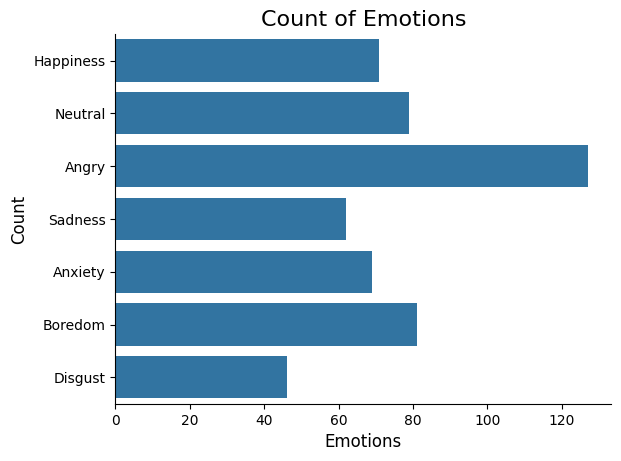

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [9]:
import librosa
import librosa.display
import IPython.display as ipd

data,sr = librosa.load(file_path[0])
sr

22050

In [10]:
ipd.Audio(data,rate=sr)

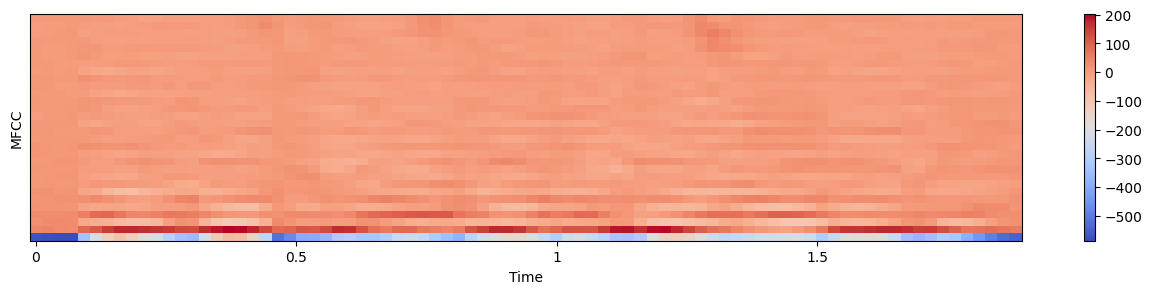

In [11]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(data,rate=sr)

In [12]:
import numpy as np
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, n_steps=2.0):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=n_steps)

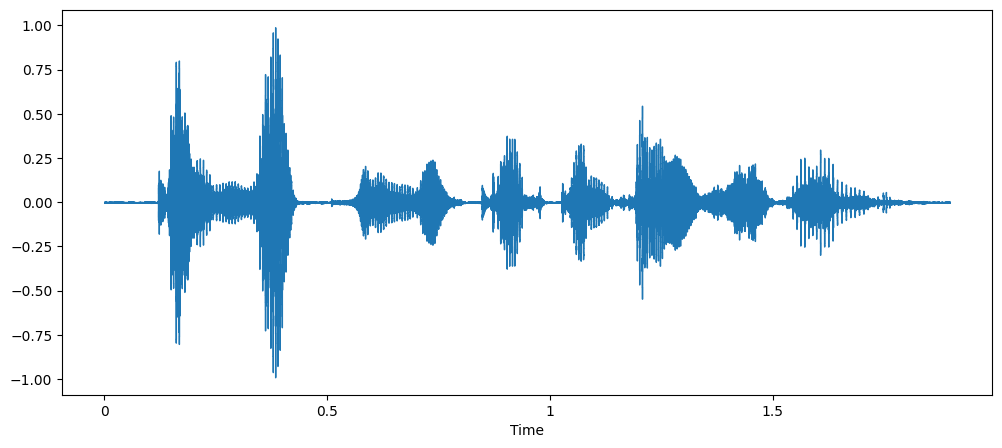

In [13]:
# NORMAL AUDIO


import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
ipd.Audio(data,rate=sr)

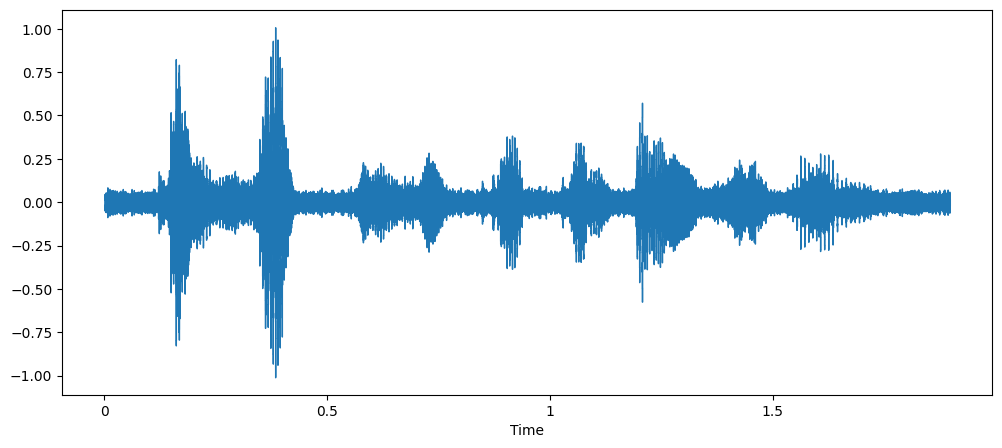

In [14]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

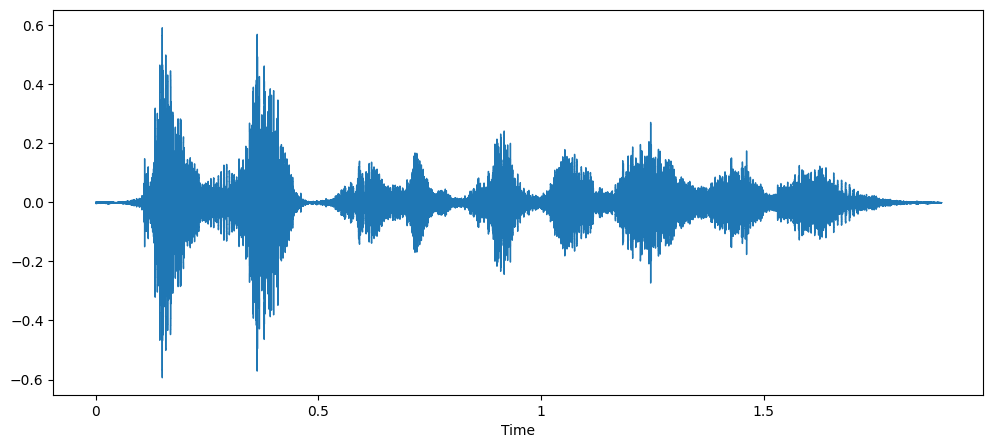

In [15]:
# AUDIO WITH PITCH
x = pitch(data, sr)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

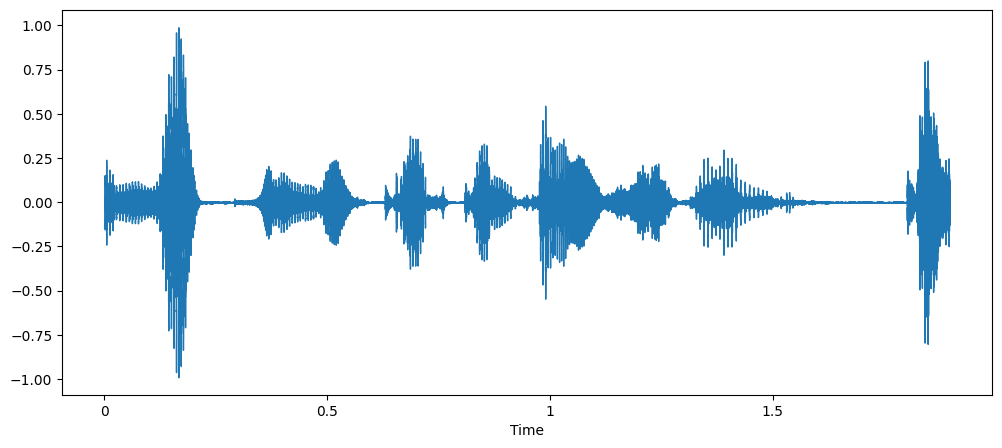

In [16]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

In [23]:
import librosa
import numpy as np

def zcr(data, frame_length, hop_length):
    zcr = librosa.feature.zero_crossing_rate(data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)

def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)

def calculate_mfcc(data, sr, frame_length=2048, hop_length=512, flatten=True):
    mfcc = librosa.feature.mfcc(y=data, sr=sr)
    return np.squeeze(mfcc.T) if not flatten else np.ravel(mfcc.T)

def extract_features(data, sr=22050, frame_length=2048, hop_length=512):
    result = np.array([])
    result = np.hstack((
        result,
        zcr(data, frame_length, hop_length),
    ))
    return result

def get_features(path, duration=2.5, offset=0.6):
    data, sr = librosa.load(path, duration=duration, offset=offset)
    aud = extract_features(data)
    audio = np.array(aud)
    
    # Add pitch shift and extract features
    pitched_audio = pitch(data, sr)
    aud3 = extract_features(pitched_audio)
    audio = np.vstack((audio, aud3))
    
    # Add pitch shift + noise and extract features
    pitched_audio1 = pitch(data, sr)
    pitched_noised_audio = noise(pitched_audio1)
    aud4 = extract_features(pitched_noised_audio)
    audio = np.vstack((audio, aud))
    
    return audio

In [24]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  16


In [25]:
import timeit
from tqdm import tqdm
start = timeit.default_timer()
X,Y=[],[]
for path,emotion,index in tqdm (zip(data_path.Path,data_path.Emotions,range(data_path.Path.shape[0]))):
    features=get_features(path)
    if index%100==0:
        print(f'{index} audio has been processed')
    for i in features:
        X.append(i)
        Y.append(emotion)
print('Done')
stop = timeit.default_timer()

print('Time: ', stop - start)   

0it [00:00, ?it/s]

3it [00:00,  9.80it/s]

0 audio has been processed


102it [00:11,  6.65it/s]

100 audio has been processed


201it [00:21, 14.00it/s]

200 audio has been processed


302it [00:33,  6.93it/s]

300 audio has been processed


402it [00:45,  7.68it/s]

400 audio has been processed


502it [00:55,  8.07it/s]

500 audio has been processed


535it [00:59,  8.98it/s]

Done
Time:  59.58975990000181


In [27]:
len(X), len(Y), data_path.Path.shape

(1605, 1605, (535,))

In [28]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('emodb_emotions_without_augmfcc1.csv', index=False)
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,Emotions
0,0.014648,0.026367,0.039062,0.043457,0.043945,0.039551,0.067383,0.098633,0.099121,0.107910,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Happiness
1,0.017578,0.026367,0.042480,0.044434,0.046875,0.082031,0.140625,0.202148,0.229492,0.214355,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Happiness
2,0.014648,0.026367,0.039062,0.043457,0.043945,0.039551,0.067383,0.098633,0.099121,0.107910,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Happiness
3,0.025391,0.035645,0.047852,0.083984,0.083496,0.083496,0.100586,0.068359,0.051270,0.045898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral
4,0.047852,0.069824,0.084961,0.085938,0.062012,0.090332,0.085938,0.082031,0.077637,0.035156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral


In [22]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('emodb_emotions_without_augmfcc.csv', index=False)
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,99,100,101,102,103,104,105,106,107,Emotions
0,0.014648,0.026367,0.039062,0.043457,0.043945,0.039551,0.067383,0.098633,0.099121,0.107910,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Happiness
1,0.017578,0.026367,0.042480,0.044434,0.046875,0.082031,0.140625,0.202148,0.229492,0.214355,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Happiness
2,0.018555,0.029297,0.051270,0.053223,0.053711,0.085938,0.141602,0.209961,0.246094,0.232910,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Happiness
3,0.025391,0.035645,0.047852,0.083984,0.083496,0.083496,0.100586,0.068359,0.051270,0.045898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral
4,0.047852,0.069824,0.084961,0.085938,0.062012,0.090332,0.085938,0.082031,0.077637,0.035156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral
